In [16]:
###########################
#
#  Assignment 3: Graph Visualization
#     - load a graph database
#     - create a basic analysis of your graph
#.    - visualize graph in Graph Visualization
#
###########################

In [17]:
###########################
#
#  Packages Used
#    - python 3.6.13 
#    - networkx 2.1 
#    - matplotlib 2.0.2 
#    - nltk 3.2.5 
#    - numpy 1.13.3 
#    - pandas 0.22.0 
#    - pygraphviz 1.3 
#    - scipy 1.0.1 
#
###########################

In [18]:
###########################
#
#  Import
#
###########################

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx import algorithms 
import itertools 

In [20]:
###########################
#
#  Load Graph from file
#
###########################

In [8]:
Data = open('data/facebook_combined_s.txt', "r")
Graphtype = nx.Graph()

In [9]:
g = nx.parse_edgelist(Data, delimiter=' ', create_using=Graphtype,
                      nodetype=int, data=(('weight', float),))

In [113]:
type(g)

networkx.classes.graph.Graph

In [23]:
###########################
#
#  draw graph
#
###########################

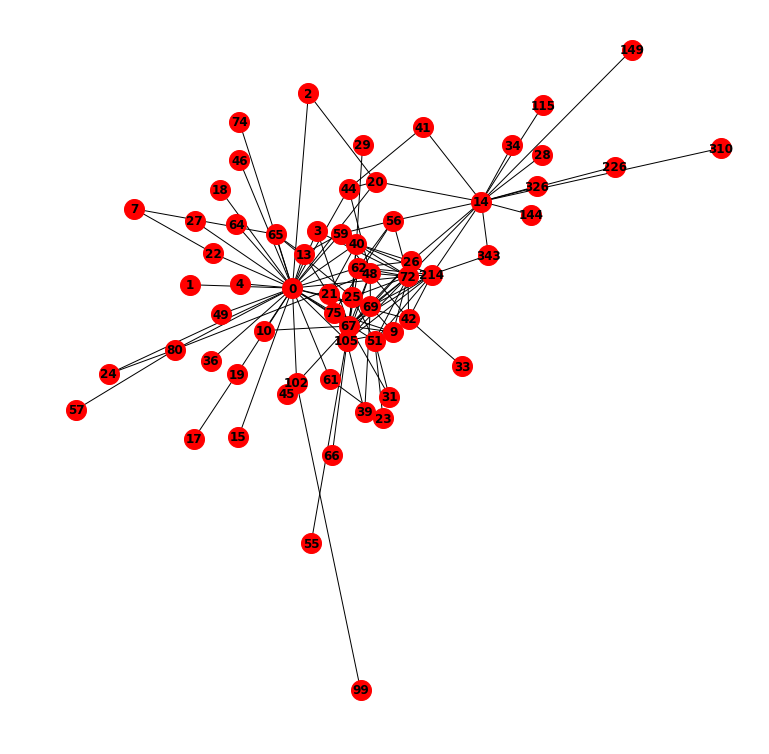

In [10]:
plt.figure(figsize=(10,10))
nx.draw(g, with_labels=True, node_size=400, font_color='black', font_weight='bold')

In [25]:
###########################
#
#  basic analysis
#
###########################

In [26]:
#####      diameter      #####
algorithms.distance_measures.diameter(g)

5

In [33]:
#####      k_nearest_neighbors      #####
algorithms.k_nearest_neighbors(g)

{33: 4.090909090909091,
 1: 20.307692307692307,
 2: 14.076923076923077,
 3: 17.333333333333332,
 4: 13.071428571428571,
 8: 11.875,
 5: 11.533333333333333,
 6: 12.083333333333334,
 7: 12.142857142857142,
 19: 6.947368421052632,
 10: 10.65,
 16: 9.8125,
 9: 9.61111111111111,
 15: 3.533333333333333}

In [28]:
#####      average neighbor      #####
algorithms.average_neighbor_degree(g,44,310)

{0: 4.090909090909091,
 1: 33.0,
 2: 18.5,
 3: 22.666666666666668,
 4: 33.0,
 10: 26.0,
 13: 15.0,
 15: 33.0,
 18: 33.0,
 19: 17.0,
 20: 13.5,
 22: 17.5,
 24: 18.5,
 27: 33.0,
 36: 33.0,
 40: 11.875,
 42: 13.8,
 44: 12.0,
 46: 33.0,
 49: 33.0,
 51: 11.666666666666666,
 59: 12.75,
 61: 17.5,
 62: 14.0,
 64: 33.0,
 65: 11.5,
 67: 6.947368421052632,
 69: 11.6,
 72: 9.8125,
 74: 33.0,
 75: 15.5,
 80: 11.25,
 102: 17.0,
 105: 10.555555555555555,
 7: 3.0,
 9: 11.6,
 14: 3.533333333333333,
 17: 2.0,
 21: 12.0,
 23: 4.0,
 25: 10.285714285714286,
 26: 12.5,
 29: 8.0,
 31: 12.5,
 33: 5.0,
 39: 9.5,
 41: 9.5,
 45: 19.0,
 48: 8.666666666666666,
 55: 19.0,
 56: 9.2,
 57: 4.0,
 66: 19.0,
 99: 2.0,
 28: 15.0,
 115: 15.0,
 34: 15.0,
 144: 15.0,
 149: 15.0,
 214: 9.7,
 226: 15.0,
 310: 15.0,
 326: 15.0,
 343: 12.5}

In [ ]:
###########################
#
#  connect to neo4j
#
###########################

In [40]:
from neo4j import GraphDatabase
import logging
from neo4j.exceptions import ServiceUnavailable

In [114]:
uri = "neo4j://localhost:7687"
user = "neo4j"
password = "AllAcd12"
driver = GraphDatabase.driver(uri, auth=(user, password))


In [58]:
query = (
    "MATCH (n:Edge1)"
    "WHERE n.Edge1 = $edge1 "
    "RETURN n.Edge1 AS edge"
)

result = driver.session().run(query, edge1='23')

In [ ]:
query = (
    "LOAD CSV WITH HEADERS FROM $file AS row"
    "MERGE (e1:Edge1 {name : row.edge1})"
    "MERGE(e2:Edge2 {name: row.edge2})"
    "MERGE (e1)-[:FRIEND]->(e2)"
    "RETURN((e1)-[:FRIEND]->(e2))"
)

result = driver.session().run(query, file='https://raw.githubusercontent.com/dsimband/DATA620_Group3/main/data/node_with_headers.csv') 

In [ ]:


query = '''
LOAD CSV FROM 'https://raw.githubusercontent.com/dsimband/DATA620_Group3/main/data/node_with_headers.csv' AS row FIELDTERMINATOR '\n'
MERGE (e1:Edge1 {name : row.edge1})
MERGE(e2:Edge2 {name: row.edge2})
MERGE (e1)-[:FRIEND]->(e2)
RETURN((e1)-[:FRIEND]->(e2))
'''

result = driver.session().run(query)

In [76]:
query = (
    "MATCH (n:Edge1)"
    "RETURN n.name AS name"
)

result = driver.session().run(query)

In [ ]:
edge = [record["name"] for record in result]
edge

In [ ]:
### graph

In [82]:
driver.close()

In [117]:
query = (
    "MATCH (n)-[r]->(c) RETURN *"
)

result = driver.session().run(query)

g = result.graph()

In [118]:
type(g)

neo4j.graph.Graph

In [ ]:
list(g.nodes)

In [ ]:
nx.draw(g, with_labels=True, node_size=400, font_color='black', font_weight='bold')

In [ ]:
### end graph

In [72]:
uri = "neo4j+s://3f239d67.databases.neo4j.io"
user = "neo4j"
password = "Os4B19FJp-_SDRlfu_Q1J2tVMRwZdZ5WLyig0RXaBRg"
driver = GraphDatabase.driver(uri, auth=(user, password))

In [28]:
query = (
    "MATCH (p:Person) "
    "WHERE p.name = $person_name "
    "RETURN p.name AS name"
)

result = driver.session().run(query, person_name='Alice')

In [29]:
g = result.graph()

In [ ]:
g.values()

In [33]:
type(g)

neo4j.graph.Graph

In [ ]:
nx.draw(g, with_labels=True, node_size=400, font_color='black', font_weight='bold')

In [12]:
type(result)

neo4j.work.result.Result

In [ ]:
driver.close()

In [ ]:
###########################
#
#  connect to neo4j
#
###########################

In [ ]:
uri = "neo4j+s://3f239d67.databases.neo4j.io"
user = "neo4j"
password = "Os4B19FJp-_SDRlfu_Q1J2tVMRwZdZ5WLyig0RXaBRg"
driver = GraphDatabase.driver(uri, auth=(user, password))

In [ ]:
query = (
    "MATCH (p:Person) "
    "RETURN p.name AS name"
)

result = driver.session().run(query)

In [ ]:
names = [record["name"] for record in result]
names

In [26]:
driver.close()

In [ ]:
###########################
#
#  connect to neo4j networkx
#
###########################

In [24]:
from neo4j import GraphDatabase
import nxneo4j as neo

In [25]:
driver = GraphDatabase.driver(uri="neo4j://localhost:7687",auth=("neo4j","AllAcd12"))

In [26]:
g_neo = neo.Graph(driver)

In [35]:
g_neo.delete_all()

In [31]:
g_neo.add_nodes_from([1,2,3,4])
g_neo.add_edges_from([(1,2),(3,4)])



In [34]:
g_neo.add_nodes_from(list(g.nodes))
g_neo.add_edges_from(list(g.edges))

In [33]:
g.nodes


NodeView((0, 1, 2, 3, 4, 10, 13, 15, 18, 19, 20, 22, 24, 27, 36, 40, 42, 44, 46, 49, 51, 59, 61, 62, 64, 65, 67, 69, 72, 74, 75, 80, 102, 105, 7, 9, 14, 17, 21, 23, 25, 26, 29, 31, 33, 39, 41, 45, 48, 55, 56, 57, 66, 99, 28, 115, 34, 144, 149, 214, 226, 310, 326, 343))

In [ ]:
g.edges